<a href="https://colab.research.google.com/github/YuvrajRawat/Anomaly-Detection-In-Social-Media-Network/blob/main/Stacking-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Tweets.csv')

In [ ]:
df['text'].fillna('', inplace=True)

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['sentiment'], test_size=0.2, random_state=42
)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_vectors = tfidf_vectorizer.fit_transform(train_data)
test_vectors = tfidf_vectorizer.transform(test_data)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='linear', probability=True, random_state=42)
nb_model = MultinomialNB()
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=42)

In [ ]:
ensemble_model = StackingClassifier(
    estimators=[('rf', rf_model), ('svm', svm_model), ('nb', nb_model)],
    final_estimator=nn_model
)

In [ ]:
ensemble_model.fit(train_vectors, train_labels)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('svm',
                                SVC(kernel='linear', probability=True,
                                    random_state=42)),
                               ('nb', MultinomialNB())],
                   final_estimator=MLPClassifier(max_iter=100, random_state=42))

In [ ]:
ensemble_predictions = ensemble_model.predict(test_vectors)

In [ ]:
accuracy = accuracy_score(test_labels, ensemble_predictions)
print(f'Ensemble Model Accuracy: {accuracy:.2f}')

Ensemble Model Accuracy: 0.72


In [ ]:
print('\nClassification Report:\n', classification_report(test_labels, ensemble_predictions))


Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.64      0.70      1562
     neutral       0.66      0.76      0.70      2230
    positive       0.79      0.75      0.77      1705

    accuracy                           0.72      5497
   macro avg       0.74      0.71      0.72      5497
weighted avg       0.73      0.72      0.72      5497



In [ ]:
cm = confusion_matrix(test_labels, ensemble_predictions)

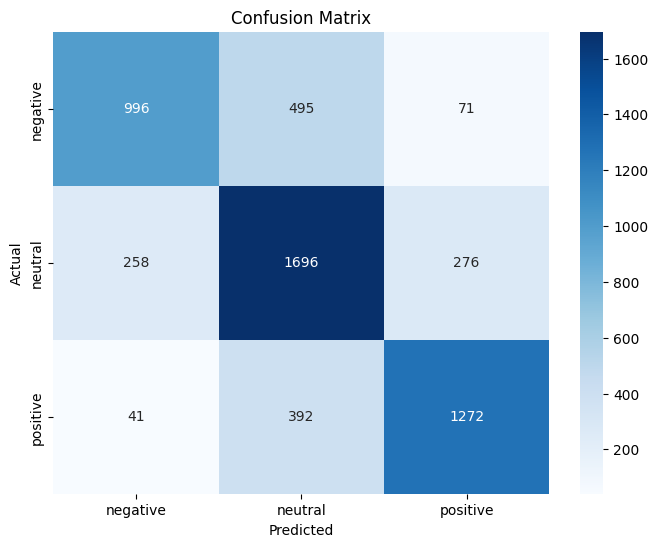

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
new_data = ["This is a positive example.", "I am not sure how I feel about this.", "Negative sentiment here."]


In [ ]:
new_vectors = tfidf_vectorizer.transform(new_data)

In [ ]:
new_predictions = ensemble_model.predict(new_vectors)

In [ ]:
for text, prediction in zip(new_data, new_predictions):
    print(f'Text: {text} | Predicted Sentiment: {prediction}')

Text: This is a positive example. | Predicted Sentiment: neutral
Text: I am not sure how I feel about this. | Predicted Sentiment: negative
Text: Negative sentiment here. | Predicted Sentiment: neutral
